<a href="https://colab.research.google.com/github/shannondill/GEOG5990M/blob/main/SecondDraft_GEOG5990M_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (2nd Draft)

Student ID number: 201896295

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



# Importing Packages and Data Sets

In [ ]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np
# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# set seaborn plotting theme to white
sns.set_theme(style="white")
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
# import further required packages
! pip install contextily
! pip install geoplot
! pip install git+https://github.com/pmdscully/geo_northarrow.git
import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow
import contextily as ctx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 99.0 MB/s eta 0:00:00
  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-_7new0q2
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-_7new0q2
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for geo_northarrow: filename=geo_northarrow-0.2.0a0-py3-none-any.whl size=14725 sha256=409cfde0028d90d3ae2bd9de85de2d98dc4ca5d06707a5b31c9e24ed42a3c0eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-uquviurl/wheels/6a/22/96/2e5d1215f457d6b69b44cbaa1a0d3b822bc656dcabcda80095
Successfully built geo_northarrow


In [ ]:
# Cycle Data (July 2024) [1]
cyclejuly24 = gpd.read_file('CycleData_July2024.csv')
cyclejuly24.columns = cyclejuly24.columns.str.lower()
cyclejuly24.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text
0,01/07/2024 00:00,80474,60,1,Eastbound,1,East,1,Checked
1,01/07/2024 00:00,80474,60,2,Westbound,2,West,0,Checked
2,01/07/2024 01:00,80474,60,1,Eastbound,1,East,0,Checked
3,01/07/2024 01:00,80474,60,2,Westbound,2,West,1,Checked
4,01/07/2024 02:00,80474,60,1,Eastbound,1,East,0,Checked


Leeds Cycle Data source (July 2024) [[1][link text](https://)](https://datamillnorth.org/dataset/e1dmk/leeds-annual-cycle-growth)

In [ ]:
# Leeds Cycle Sites [2]
cyclesites = gpd.read_file('ListCycleCountSites_Leeds_Sept2024.csv')
cyclesites.columns = cyclesites.columns.str.lower()
cyclesites.head()

,site_id,site_name,description,grid,latitude,longitude
0,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.19893E+11,53.8029,-1.69942
1,80475,Cycle H0475,A647 Bradford Road Cycle Superhighway (westbound),4.2002E+11,53.80304,-1.6975
2,90120,Cycle I0120,Kirkstall Forge Canal Towpath Cycle Counter,4.24939E+11,53.82305,-1.62262
3,90241,Cycle I0241,Cardigan Lane Cycle Counter,4.28226E+11,53.81308,-1.57279
4,90319,Cycle I0319,Stanningley Road Cycle Superhighway (eastbound),4.24547E+11,53.80571,-1.62874


Cycle Count Data Sites- Leeds District [[2]](https://datamillnorth.org/dataset/e1dmk/leeds-annual-cycle-growth)

In [ ]:
# HAVEN'T DECIDED IF I NEED THIS OR NOT??!
# upload files
# Leeds MSOA shapefile
#msoa_leeds = gpd.read_file('LEEDS_MSOA.xlsx')
#msoa_leeds.columns = msoa_leeds.columns.str.lower()
#msoa_leeds.head()

,fid,msoa21cd,msoa21nm,bng_e,bng_n,lat,long,shape__area,shape__length,globalid
0,2232,E02002330,Leeds 001,439371,447994,53.92660,-1.40193,3.379603e+06,11553.005906,efb39ec5-9dba-4376-b036-7e60d975a4f1
1,2233,E02002331,Leeds 002,442708,447639,53.92315,-1.35117,2.153470e+07,29327.737018,66ed12f3-996a-4060-9580-8c5ac5ec838b
2,2234,E02002332,Leeds 003,419730,446090,53.91061,-1.70115,2.900547e+06,10183.996153,082ebeee-3ed8-4ca7-9f7a-60ba02edee74
3,2235,E02002333,Leeds 004,420298,445045,53.90119,-1.69257,8.971210e+06,16211.665063,3b60578b-38ee-48a9-8c75-fd2a8a61be02
4,2236,E02002334,Leeds 005,441960,443308,53.88429,-1.36315,2.540711e+07,30282.009909,af7cd689-c855-4394-8201-72af0b4be171


In [ ]:
# Leeds LSOA Boundary data [3]
lsoa_leeds = gpd.read_file('LSOA_LEEDS.xlsx')
lsoa_leeds.columns = lsoa_leeds.columns.str.lower()
lsoa_leeds.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,6.373247e+05,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67
1,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.71270,5.273672e+05,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f
2,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2.531467e+06,8353.989324,66191f73-111e-4f37-ba33-42666730927f
3,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,4.491912e+05,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326
4,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.69390,3.949483e+05,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8


Leeds LSOA Boundary Data [[3]](https://geoportal.statistics.gov.uk/datasets/ons::lower-layer-super-output-areas-december-2021-boundaries-ew-bfc-v10-2/about)

In [ ]:
# travel to work data
# Data source: University of Leeds, Geography Dept, re: F.Pontin [4]
# will use to isolate geometry of LSOAs
leeds_travel = gpd.read_file('leeds_travel_to_work_mode_distance.geojson.txt')
leeds_travel.columns = leeds_travel.columns.str.lower()
leeds_travel.head()

,fid,lsoa21cd,lsoa21nm,wd24nm,bng_e,bng_n,long,lat,total_distance_to_work,less than 10km,...,"bus, minibus or coach",taxi,"motorcycle, scooter or moped",driving a car or van,passenger in a car or van,bicycle,on foot,other method of travel to work,not in employment or aged 15 years and under,geometry
0,10720,E01011264,Leeds 011A,Otley & Yeadon,420937,441836,-1.68306,53.87232,1284,200,...,25,2,1,312,23,5,45,6,703,"POLYGON ((421248.688 442315.812, 421284.072 44..."
1,10721,E01011265,Leeds 009A,Guiseley & Rawdon,418988,441951,-1.71269,53.87343,1953,240,...,17,4,2,335,23,11,72,10,998,"POLYGON ((418635 442559, 418637.555 442552.869..."
2,10722,E01011266,Leeds 008A,Guiseley & Rawdon,417489,442615,-1.73545,53.87945,2617,356,...,13,7,0,603,24,9,60,7,1174,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,Guiseley & Rawdon,419641,442025,-1.70276,53.87407,1701,269,...,15,8,3,373,21,8,87,3,937,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,Otley & Yeadon,420224,441935,-1.69390,53.87324,1401,278,...,35,8,1,316,36,10,99,2,757,"POLYGON ((420442.406 442436.687, 420443.313 44..."


Leeds Travel to Work data [[4]](https://raw.githubusercontent.com/FrancescaPontin/GEOG5990M/refs/heads/main/data/week_6_7/leeds_travel_to_work_mode_distance.geojson)

# Data Cleaning

In [ ]:
# table join LEFT
# cyclejuly24 --> cyclesites
# cosit --> siteid
cycleleeds24 = pd.merge(cyclejuly24, cyclesites, left_on='cosit', right_on='site_id',
                        how='left')
cycleleeds24.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text,site_id,site_name,description,grid,latitude,longitude
0,01/07/2024 00:00,80474,60,1,Eastbound,1,East,1,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.19893E+11,53.8029,-1.69942
1,01/07/2024 00:00,80474,60,2,Westbound,2,West,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.19893E+11,53.8029,-1.69942
2,01/07/2024 01:00,80474,60,1,Eastbound,1,East,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.19893E+11,53.8029,-1.69942
3,01/07/2024 01:00,80474,60,2,Westbound,2,West,1,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.19893E+11,53.8029,-1.69942
4,01/07/2024 02:00,80474,60,1,Eastbound,1,East,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.19893E+11,53.8029,-1.69942


In [ ]:
# add geometry to lsoa_leeds
### CO-PILOT ###
# The following prompt was used in Co-pilot to isolate and join the geometry column with the LSOA data:
# "python, pandas: how to merge a table with only one column from another table?"
# The response generated was used to help write the below code

leeds_geo = lsoa_leeds.merge(leeds_travel[['fid', 'geometry']], on='fid')
# Ensure it is saved as a GeoDataFrame (to make use of the geometry)
leeds_geo = gpd.GeoDataFrame(leeds_geo)
leeds_geo.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,6.373247e+05,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,"POLYGON ((421248.688 442315.812, 421284.072 44..."
1,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.71270,5.273672e+05,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f,"POLYGON ((418635 442559, 418637.555 442552.869..."
2,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2.531467e+06,8353.989324,66191f73-111e-4f37-ba33-42666730927f,"POLYGON ((417783.688 443382.312, 417788.688 44..."
3,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,4.491912e+05,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326,"POLYGON ((419607.843 442388.568, 419612.752 44..."
4,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.69390,3.949483e+05,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8,"POLYGON ((420442.406 442436.687, 420443.313 44..."


In [ ]:
# leeds_geo
leeds_geo.describe()

,fid,bng_e,bng_n,lat,long,shape__area,shape__length
count,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,438.000000
mean,10938.500000,429818.481735,435195.335616,53.812176,-1.548641,1.170913e+06,5911.739100
std,126.583964,6015.976680,4870.616895,0.043790,0.091361,2.537639e+06,4196.709870
min,10720.000000,415777.000000,424017.000000,53.711790,-1.761520,6.841824e+04,1468.561952
25%,10829.250000,425373.750000,432222.750000,53.785422,-1.616080,2.936800e+05,3670.494266
50%,10938.500000,429457.000000,435160.000000,53.811810,-1.554050,4.179098e+05,4679.396698
75%,11047.750000,433679.500000,437941.000000,53.836860,-1.490085,8.699476e+05,6494.905567
max,11157.000000,444141.000000,449492.000000,53.940050,-1.330510,2.551487e+07,30781.985056


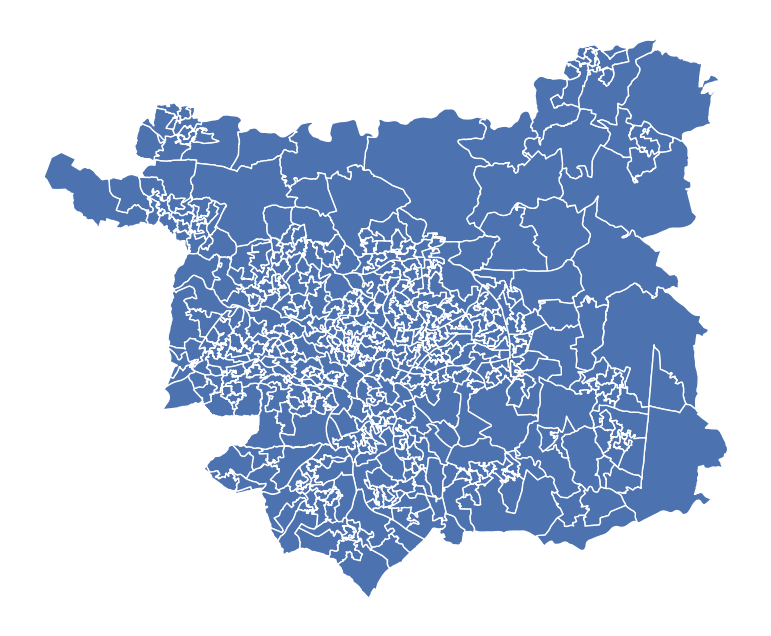

In [ ]:
# plot leeds_geo
# define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# plot leeds_geo data specifying subplot axis
leeds_geo.plot(ax=ax)
# make axis invisible
ax.set_axis_off()
plt.show()

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>